In [ ]:
import torch
%matplotlib inline
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("diabetes.csv")

features = ['Pregnancies' , 'Glucose', 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' ,
            'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

X = data[features].values
y = data[target].values

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = y.reshape(-1, 1)

## Convert to pytorch sensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train, X_val, y_train, y_val = train_test_split(
    X_tensor, y_tensor, test_size = 0.2, random_state = 23)

Saving diabetes.csv to diabetes.csv


In [ ]:
## Neural network
model = nn.Sequential(
    nn.Linear(8,32), ## 8 input features, 32 neurons
    nn.ReLU(),
    nn.Linear(32,16), ## 32 inputs, 16 neurons
    nn.ReLU(),
    nn.Linear(16,8), ## 16 inputs, 8 neurons
    nn.ReLU(),
    nn.Linear(8,1) ## 8 inputs, 1 neuron
)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 200
train_losses = []
val_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, y_train)
    train_loss.backward()
    optimizer.step()

    ## Validation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d} | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f}")
print(f"Epoch {num_epochs} (Final) | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

training_time = time.time() - start_time

y_val_true = y_val.detach().numpy()
y_val_pred = y_val_pred.detach().numpy()

print("\n Final Results")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")

Epoch   0 | Train Loss: 0.7358 | Val Loss: 0.7353
Epoch  20 | Train Loss: 0.7026 | Val Loss: 0.6999
Epoch  40 | Train Loss: 0.6570 | Val Loss: 0.6482
Epoch  60 | Train Loss: 0.5874 | Val Loss: 0.5663
Epoch  80 | Train Loss: 0.5187 | Val Loss: 0.4854
Epoch 100 | Train Loss: 0.4749 | Val Loss: 0.4490
Epoch 120 | Train Loss: 0.4580 | Val Loss: 0.4440
Epoch 140 | Train Loss: 0.4485 | Val Loss: 0.4408
Epoch 160 | Train Loss: 0.4402 | Val Loss: 0.4385
Epoch 180 | Train Loss: 0.4316 | Val Loss: 0.4376
Epoch 200 (Final) | Train Loss: 0.4230 | Val Loss: 0.4395

 Final Results
Training Time: 0.37 seconds
Final Training Loss: 0.4230
Final Validation Loss: 0.4395


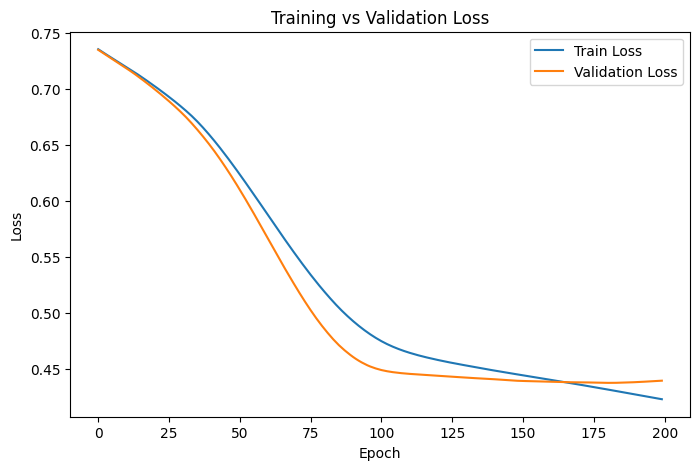

In [ ]:
## Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [ ]:
## Classification metrics
model.eval()
with torch.no_grad():
    y_val_logits = model(X_val)
    y_val_prob = torch.sigmoid(y_val_logits) > 0.5
    y_val_pred = (y_val_prob >= 0.5).int()

y_true = y_val.numpy()
y_pred = y_val_pred.numpy()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")




Accuracy:  0.8117
Precision: 0.7308
Recall:    0.7170
F1 Score:  0.7238
Training Time: 0.37 seconds


In [ ]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='rbf')
svm.fit(X_scaled, y)
svm_pred = svm.predict(X_scaled)
print("\nSVM (RBF):")
print("Accuracy:", accuracy_score(y, svm_pred))
print("Precision:", precision_score(y, svm_pred))
print("Recall:", recall_score(y, svm_pred))
print("F1:", f1_score(y, svm_pred))


SVM (RBF):
Accuracy: 0.82421875
Precision: 0.821256038647343
Recall: 0.6343283582089553
F1: 0.7157894736842105


In [ ]:
import torch
%matplotlib inline
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y.reshape(-1, 1)

## Convert to pytorch sensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train, X_val, y_train, y_val = train_test_split(
    X_tensor, y_tensor, test_size = 0.2, random_state = 23)

In [ ]:
## Neural network
model = nn.Sequential(
    nn.Linear(30,64), ## 30 input features, 64 neurons
    nn.ReLU(),
    nn.Linear(64,32), ## 64 inputs, 32 neurons
    nn.ReLU(),
    nn.Linear(32,16), ## 32 inputs, 16 neurons
    nn.ReLU(),
    nn.Linear(16,1) ## 16 inputs, 1 neuron
)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 200
train_losses = []
val_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, y_train)
    train_loss.backward()
    optimizer.step()

    ## Validation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d} | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f}")
print(f"Epoch {num_epochs} (Final) | Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

training_time = time.time() - start_time

y_val_true = y_val.detach().numpy()
y_val_pred = y_val_pred.detach().numpy()

print("\n Final Results")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")

In [ ]:
## Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [ ]:
## Classification metrics
model.eval()
with torch.no_grad():
    y_val_logits = model(X_val)
    y_val_prob = torch.sigmoid(y_val_logits) > 0.5
    y_val_pred = (y_val_prob >= 0.5).int()

y_true = y_val.numpy()
y_pred = y_val_pred.numpy()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

In [ ]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='rbf')
svm.fit(X_scaled, y)
svm_pred = svm.predict(X_scaled)
print("\nSVM (RBF):")
print("Accuracy:", accuracy_score(y, svm_pred))
print("Precision:", precision_score(y, svm_pred))
print("Recall:", recall_score(y, svm_pred))
print("F1:", f1_score(y, svm_pred))

In [ ]:
import torch
import torch.nn as nn
import torch.optim
import torchvision
import torchvision.transforms as transforms
import time

from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
## CIFAR-10 normalization vals(3 channels, RGB)
mean = (0.4914, 0.4822, 0.4465) ## one mean + one std per channel
std =  (0.2470, 0.2435, 0.2616)

transform = transforms.Compose([
    transforms.ToTensor(), ## convert PIL img to tensor, convert pixel vals to 0-1 float
    transforms.Normalize(mean, std)

])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform) ## load training split of CIFAR-10
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform) ## load the test set of 10k images

## load data in mini-batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3072, 512), # 3072 input features, 512 hidden neurons
    nn.ReLU(),
    nn.Linear(512, 10) # 512 hidden features, 10 output classes
)
print(model)
model = model.to(device)

In [ ]:
# Loss, Optimizer, Training setup
loss_fn = nn.CrossEntropyLoss() ## combination of softmax and Nllloss
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
num_epochs = 10


# Training Loop

train_losses = []
train_accuracies = []
epoch_times = []

for epoch in range(num_epochs):
    start = time.time()
    model.train()

    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Metrics for the epoch
    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total
    elapsed = time.time() - start

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    epoch_times.append(elapsed)

    print(f"Epoch {epoch+1}/{num_epochs}  "
          f"Loss: {avg_loss:.4f}  "
          f"Accuracy: {accuracy:.4f}  "
          f"Time: {elapsed:.2f}s")

In [ ]:
import torch
from torchvision import datasets, transforms

# Load raw CIFAR-10 (no normalization)
transform = transforms.ToTensor()
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

loader = torch.utils.data.DataLoader(dataset, batch_size=50000, shuffle=False)

images, _ = next(iter(loader))  # all 50k images

# Compute per-channel mean and std
mean = images.mean(dim=[0,2,3])
std = images.std(dim=[0,2,3])

print("Mean:", mean)
print("Std:", std)

In [ ]:
import torch
import torch.nn as nn
import torch.optim
import torchvision
import torchvision.transforms as transforms
import time

from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
## CIFAR-10 normalization vals(3 channels, RGB)
mean = (0.4914, 0.4822, 0.4465) ## one mean + one std per channel
std =  (0.2470, 0.2435, 0.2616)

transform = transforms.Compose([
    transforms.ToTensor(), ## convert PIL img to tensor, convert pixel vals to 0-1 float
    transforms.Normalize(mean, std)

])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform) ## load training split of CIFAR-10
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform) ## load the test set of 10k images

## load data in mini-batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3072, 512), # Hidden layer 1
    nn.ReLU(),

    nn.Linear(512, 256), # Hidden layer 2
    nn.ReLU(),

    nn.Linear(256, 128), # Hidden Layer 3
    nn.ReLU(),

    nn.Linear(128, 10) # Output layer(10 classes)
)
print(model)
model = model.to(device)

In [ ]:
# Loss, Optimizer, Training setup
loss_fn = nn.CrossEntropyLoss() ## combination of softmax and Nllloss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 300


# Training Loop

train_losses = []
train_accuracies = []
epoch_times = []

for epoch in range(num_epochs):
    start = time.time()
    model.train()

    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Metrics for the epoch
    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total
    elapsed = time.time() - start

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    epoch_times.append(elapsed)

    print(f"Epoch {epoch+1}/{num_epochs}  "
          f"Loss: {avg_loss:.4f}  "
          f"Accuracy: {accuracy:.4f}  "
          f"Time: {elapsed:.2f}s")